# Assignment 2

Abstract: In this assignment we are performing linear and logistics regression on the dataset 'Family Income and Expenditure.csv' in order to conclude how the variables are dependent on each other. Also, exploratory data analysis is performed to make sure the data fed in the model is consistent and free of null values. Also, performed interaction effects and regularization on the dataframe. The dataset consists of 60 columns and 41545 rows. The main input variables used for analysis are Total Household Income, Total Food Expenditure, Bread and Cereals Expenditure, Meat Expenditure, Total Fish and marine products Expenditure, Fruit Expenditure, Vegetables Expenditure, Restaurant and hotels Expenditure, Clothing, Footwear and Other Wear Expenditure, Housing and water Expenditure, Transportation Expenditure, Communication Expenditure, Household Head Sex, Type of Household, Number of Cellular phone, Number of Personal Computer. 
Target variable: Total Food Expenditure.

In [6]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

Uploading the dataset into the dataframe to perform operations on it. Also, retrieving top 5 rows of the dataset.

In [8]:
#importing data frame
df=pd.read_csv("Family Income and Expenditure.csv")
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [9]:
#to display the top 5 rows
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


Used Describe function to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [10]:
#Descibes statistical analysis of the dataset
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


Checking for null values in the data frame.

In [11]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

Dropping columns with null values since those columns are not required for analysis.

In [12]:
df.drop('Household Head Occupation',axis='columns',inplace=True)

In [13]:
df.drop('Household Head Class of Worker',axis='columns',inplace=True)

Checking for null values again.

In [14]:
df.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

Finding correlation between the columns to find out how strongly each pair of variables are related.

In [15]:
df.corr()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
Total Household Income,1.000000,0.663660,0.020201,0.276606,0.162479,0.567142,0.395066,0.448943,0.373222,0.510017,...,0.473454,0.443680,0.551994,0.546663,0.343629,0.488106,0.557561,0.380141,0.005272,0.231296
Total Food Expenditure,0.663660,1.000000,0.038216,0.600319,0.435908,0.771272,0.605594,0.526141,0.556082,0.732175,...,0.436079,0.468102,0.396661,0.367439,0.288513,0.597036,0.504225,0.303332,0.009953,0.244034
Agricultural Household indicator,0.020201,0.038216,1.000000,-0.025295,-0.037258,-0.014275,-0.003625,0.015393,0.026298,0.087571,...,-0.057720,0.010476,0.009180,-0.003215,0.054327,-0.060403,-0.032729,-0.055408,0.015868,-0.103316
Bread and Cereals Expenditure,0.276606,0.600319,-0.025295,1.000000,0.876286,0.346779,0.391389,0.228850,0.349198,0.172527,...,0.136920,0.136520,0.100906,0.106448,0.074433,0.360848,0.173119,0.095625,0.029830,0.167612
Total Rice Expenditure,0.162479,0.435908,-0.037258,0.876286,1.000000,0.215042,0.277696,0.117725,0.233262,0.091281,...,0.068070,0.068592,0.027598,0.039021,0.018406,0.282364,0.081551,0.039625,0.030319,0.137148
Meat Expenditure,0.567142,0.771272,-0.014275,0.346779,0.215042,1.000000,0.465416,0.419363,0.474344,0.434983,...,0.453508,0.486053,0.358541,0.328674,0.247295,0.527806,0.475089,0.301098,-0.020785,0.254268
Total Fish and marine products Expenditure,0.395066,0.605594,-0.003625,0.391389,0.277696,0.465416,1.000000,0.356489,0.485591,0.207284,...,0.247765,0.214942,0.225069,0.215770,0.155511,0.337630,0.266235,0.185711,0.068209,0.187190
Fruit Expenditure,0.448943,0.526141,0.015393,0.228850,0.117725,0.419363,0.356489,1.000000,0.438245,0.282082,...,0.318554,0.289306,0.316695,0.293263,0.230116,0.298918,0.358181,0.244881,0.008978,0.138926
Vegetables Expenditure,0.373222,0.556082,0.026298,0.349198,0.233262,0.474344,0.485591,0.438245,1.000000,0.197452,...,0.252031,0.249993,0.206433,0.217165,0.153490,0.329750,0.280515,0.194297,0.036227,0.176666
Restaurant and hotels Expenditure,0.510017,0.732175,0.087571,0.172527,0.091281,0.434983,0.207284,0.282082,0.197452,1.000000,...,0.299694,0.365668,0.317894,0.293255,0.250187,0.419113,0.389226,0.201361,-0.021802,0.106665


Plotting heatmap to get a visual representation of correlation between each pair of variables.

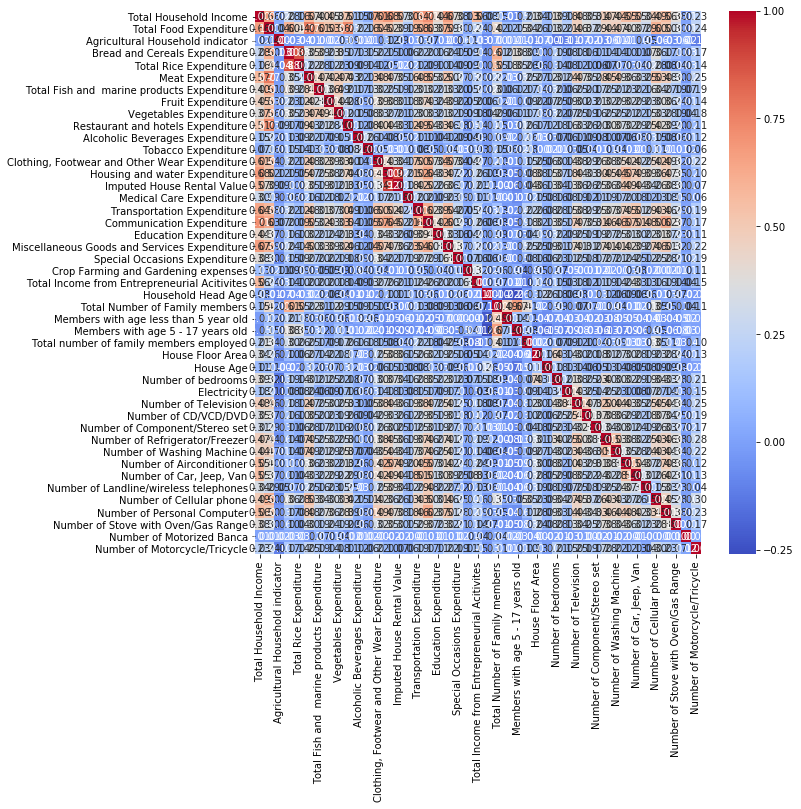

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Dropping columns with low correlation values with the target column Total Food Expenditure beacause of low dependency.

In [17]:
df.drop('Household Head Highest Grade Completed',axis='columns',inplace=True)

In [18]:
df.drop('Type of Walls',axis='columns',inplace=True)

In [19]:
df.drop('House Floor Area',axis='columns',inplace=True)

In [20]:
df.drop('House Age',axis='columns',inplace=True)

In [21]:
df.drop('Number of bedrooms',axis='columns',inplace=True)

In [22]:
df.drop('Region',axis='columns',inplace=True)

In [23]:
df.drop('Household Head Marital Status',axis='columns',inplace=True)

Converting the string values of multicategorical and binary categorical columns into numbers.

In [24]:
df['Main Source of Income'] = pd.DataFrame(df['Main Source of Income'])
df['Main Source of Income']=df['Main Source of Income'].astype("category").cat.codes
df['Main Source of Income'].head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    1
8    1
9    0
Name: Main Source of Income, dtype: int8

In [25]:
df['Household Head Sex'] = pd.DataFrame(df['Household Head Sex'])
df['Household Head Sex']=df['Household Head Sex'].astype("category").cat.codes
df['Household Head Sex'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Household Head Sex, dtype: int8

In [26]:
df['Household Head Job or Business Indicator'] = pd.DataFrame(df['Household Head Job or Business Indicator'])
df['Household Head Job or Business Indicator']=df['Household Head Job or Business Indicator'].astype("category").cat.codes
df['Household Head Job or Business Indicator'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Household Head Job or Business Indicator, dtype: int8

In [27]:
df['Type of Household'] = pd.DataFrame(df['Type of Household'])
df['Type of Household']=df['Type of Household'].astype("category").cat.codes
df['Type of Household'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    0
Name: Type of Household, dtype: int8

In [28]:
df.drop('Household Head Age',axis='columns',inplace=True)

In [29]:
df.drop('Main Source of Water Supply',axis='columns',inplace=True)

In [30]:
df.drop('Type of Roof',axis='columns',inplace=True)

In [31]:
df.drop('Toilet Facilities',axis='columns',inplace=True)

In [32]:
X = df.drop('Total Household Income', axis = 1)
Y = df[['Total Household Income']]

In [33]:
df.drop('Agricultural Household indicator',axis='columns',inplace=True)

In [34]:
df.drop('Alcoholic Beverages Expenditure',axis='columns',inplace=True)

In [35]:
df.drop('Imputed House Rental Value',axis='columns',inplace=True)

In [36]:
df.drop('Education Expenditure',axis='columns',inplace=True)

In [37]:
df.drop('Miscellaneous Goods and Services Expenditure',axis='columns',inplace=True)

In [38]:
df.drop('Special Occasions Expenditure',axis='columns',inplace=True)

In [39]:
df.drop('Crop Farming and Gardening expenses',axis='columns',inplace=True)

In [40]:
df.drop('Total Income from Entrepreneurial Acitivites',axis='columns',inplace=True)

In [41]:
df.drop('Total Number of Family members',axis='columns',inplace=True)

In [42]:
df.drop('Members with age less than 5 year old',axis='columns',inplace=True)

In [43]:
df.drop('Members with age 5 - 17 years old',axis='columns',inplace=True)

In [44]:
df.drop('Total number of family members employed',axis='columns',inplace=True)

In [45]:
df.drop('Electricity',axis='columns',inplace=True)

In [46]:
df.drop('Number of Television',axis='columns',inplace=True)

In [47]:
df.drop('Number of CD/VCD/DVD',axis='columns',inplace=True)

In [48]:
df.drop('Number of Component/Stereo set',axis='columns',inplace=True)

In [49]:
df.drop('Number of Refrigerator/Freezer',axis='columns',inplace=True)

In [50]:
df.drop('Number of Washing Machine',axis='columns',inplace=True)

In [51]:
df.drop('Number of Airconditioner',axis='columns',inplace=True)

In [52]:
df.drop('Number of Car, Jeep, Van',axis='columns',inplace=True)

In [53]:
df.drop('Number of Landline/wireless telephones',axis='columns',inplace=True)

In [54]:
df.drop('Number of Stove with Oven/Gas Range',axis='columns',inplace=True)

In [55]:
df.drop('Number of Motorized Banca',axis='columns',inplace=True)

In [56]:
df.drop('Number of Motorcycle/Tricycle',axis='columns',inplace=True)

After dropping columns with low correlation value and converting string values into number, displaying top 5 values of the updated dataframe.

In [58]:
df.head()

,Total Household Income,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Household Head Sex,Household Head Job or Business Indicator,Type of Household,Type of Building/House,Tenure Status,Number of Cellular phone,Number of Personal Computer
0,480332,117848,2,42140,38300,24676,16806,3325,13460,3000,...,3457,4776,2880,0,1,0,Single house,Own or owner-like possession of house and lot,2,1
1,198235,67766,2,17329,13008,17434,11073,2035,7833,2360,...,3520,12900,5700,1,1,1,Single house,Own or owner-like possession of house and lot,3,1
2,82785,61609,2,34182,32001,7783,2590,1730,3795,4545,...,70,324,420,1,1,1,Single house,Own or owner-like possession of house and lot,0,0
3,107589,78189,2,34030,28659,10914,10812,690,7887,6280,...,60,6840,660,1,1,1,Single house,Own or owner-like possession of house and lot,1,0
4,189322,94625,2,34820,30167,18391,11309,1395,11260,6400,...,140,6996,2100,1,1,1,Single house,Own or owner-like possession of house and lot,3,0


In [59]:
df.drop('Type of Building/House',axis='columns',inplace=True)

In [60]:
df.drop('Tenure Status',axis='columns',inplace=True)

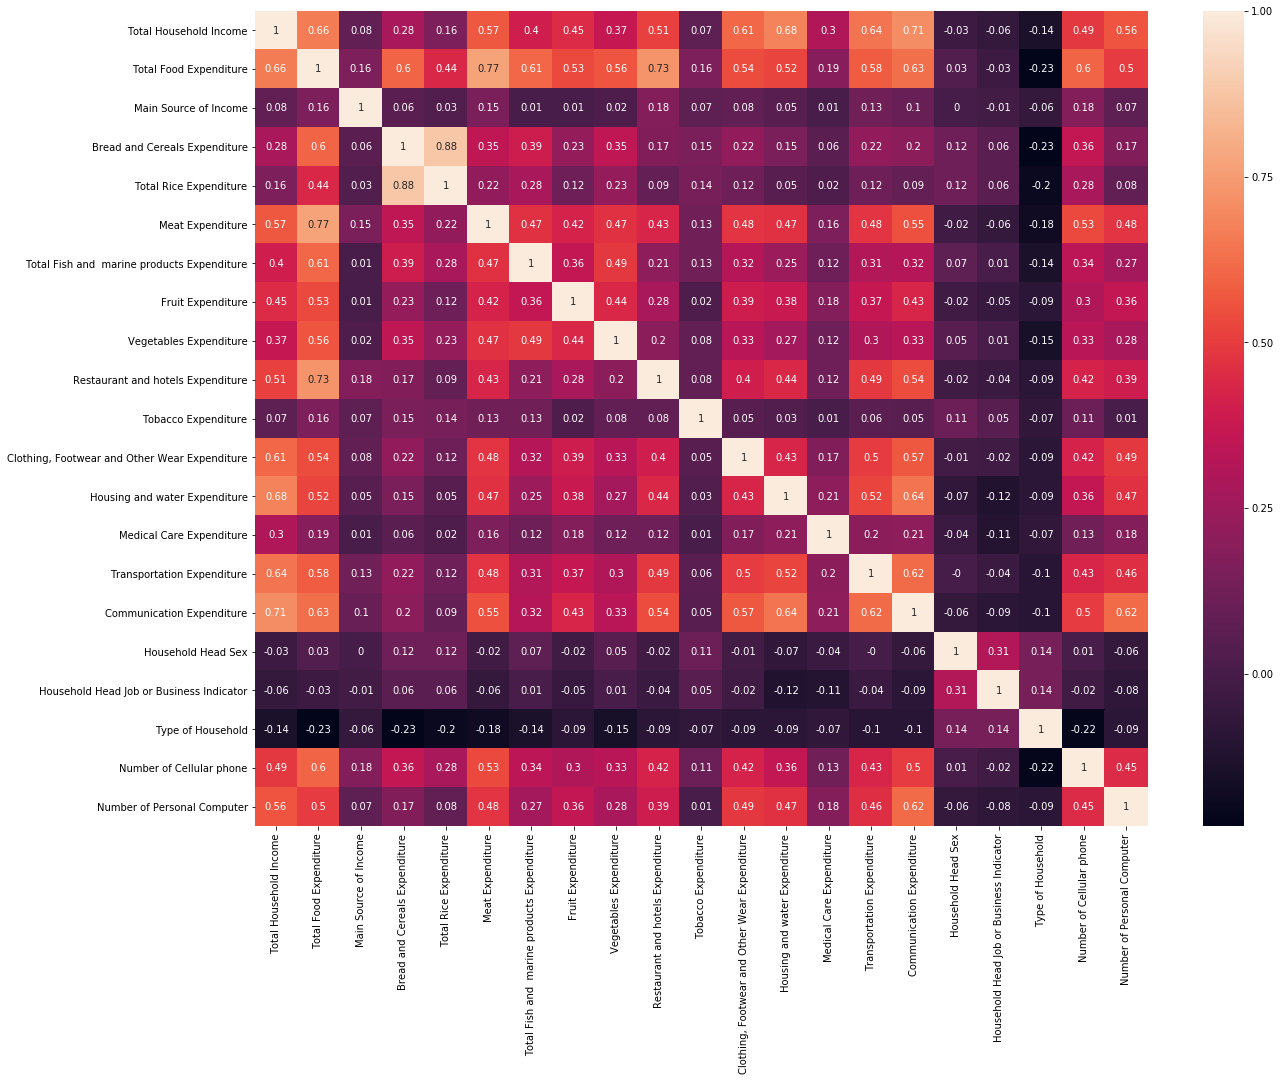

In [61]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

In [62]:
df.drop('Main Source of Income',axis='columns',inplace=True)

In [63]:
df.drop('Total Rice Expenditure',axis='columns',inplace=True)

In [64]:
df.drop('Tobacco Expenditure',axis='columns',inplace=True)

In [65]:
df.drop('Medical Care Expenditure',axis='columns',inplace=True)

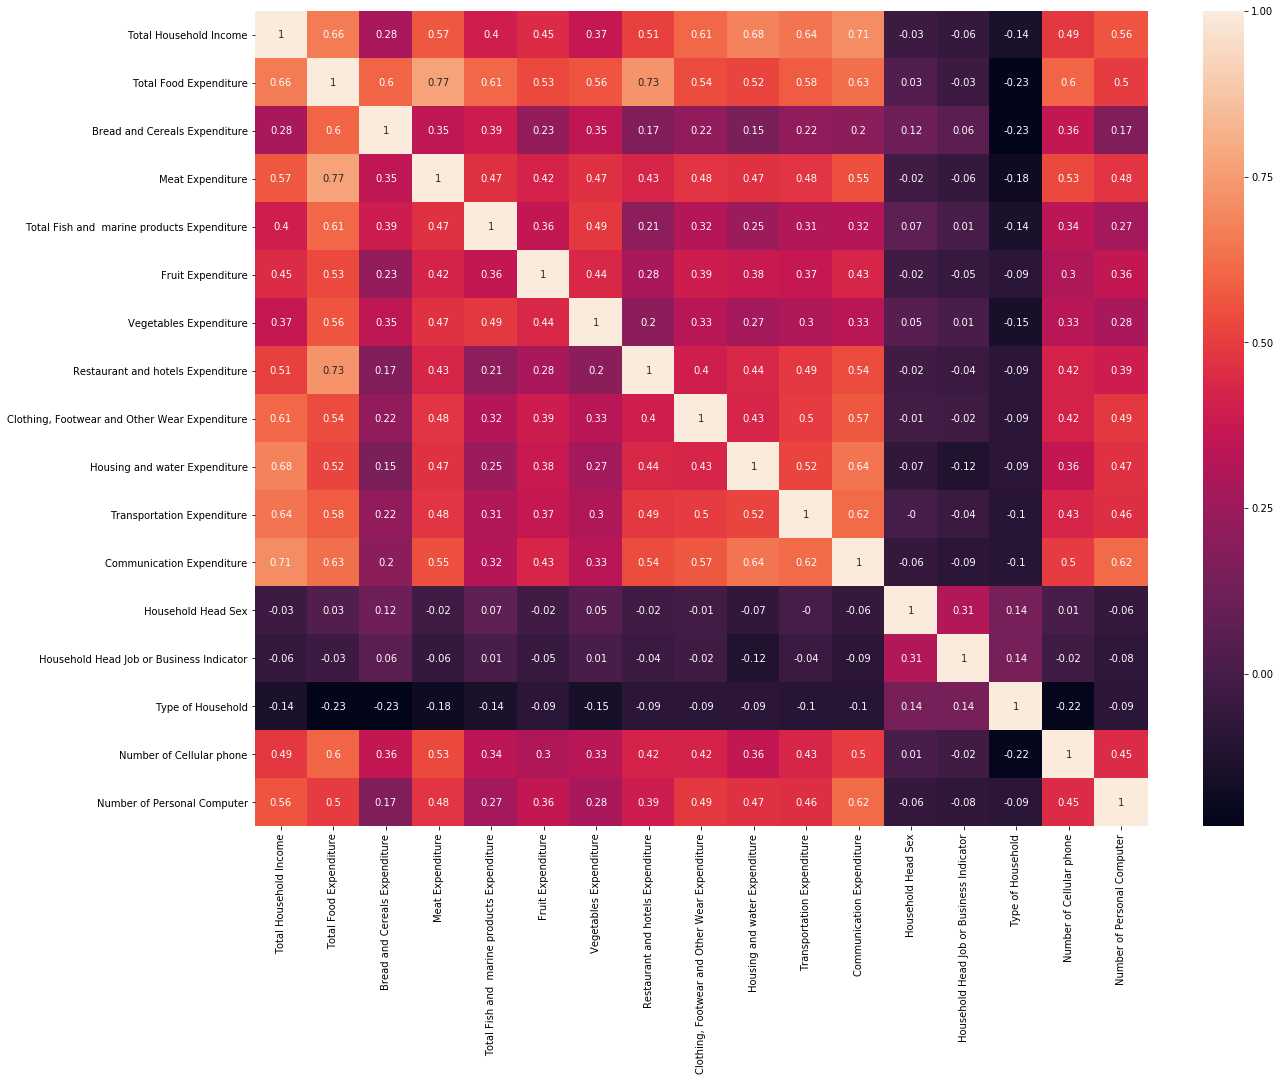

In [66]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

Converting the column names into variable names by replacing whitespace between the words with '_'.

In [67]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

,total_household_income,total_food_expenditure,bread_and_cereals_expenditure,meat_expenditure,total_fish_and__marine_products_expenditure,fruit_expenditure,vegetables_expenditure,restaurant_and_hotels_expenditure,"clothing,_footwear_and_other_wear_expenditure",housing_and_water_expenditure,transportation_expenditure,communication_expenditure,household_head_sex,household_head_job_or_business_indicator,type_of_household,number_of_cellular_phone,number_of_personal_computer
0,480332,117848,42140,24676,16806,3325,13460,3000,4607,63636,4776,2880,0,1,0,2,1
1,198235,67766,17329,17434,11073,2035,7833,2360,8230,41370,12900,5700,1,1,1,3,1
2,82785,61609,34182,7783,2590,1730,3795,4545,2735,14340,324,420,1,1,1,0,0
3,107589,78189,34030,10914,10812,690,7887,6280,1390,16638,6840,660,1,1,1,1,0
4,189322,94625,34820,18391,11309,1395,11260,6400,4620,31122,6996,2100,1,1,1,3,0
5,152883,73326,29065,15336,8572,2614,9035,0,1930,22782,4044,1500,1,1,1,4,0
6,198621,104644,40992,12968,12310,2565,15620,6200,7930,24126,12696,1848,1,1,0,2,0
7,134961,95644,37168,14640,15896,3365,10520,1130,4085,40776,4140,3000,1,1,0,2,0
8,171152,67348,23117,11464,6685,1370,5235,10550,2780,8370,7200,1800,0,0,1,2,0
9,625753,158721,56003,26488,25678,3880,11360,15620,7740,65730,5160,7200,1,1,0,4,1


# Linear Regression

Model-1

In [68]:
cols_to_use = ['total_household_income'
,'bread_and_cereals_expenditure'
,'meat_expenditure'
,'total_fish_and__marine_products_expenditure'
,'fruit_expenditure'
,'vegetables_expenditure'
,'restaurant_and_hotels_expenditure'
,'clothing,_footwear_and_other_wear_expenditure'
,'housing_and_water_expenditure'
,'transportation_expenditure'
,'communication_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
y_cols_to_use = ['total_food_expenditure']
X = df[cols_to_use]
y = df[y_cols_to_use]

X represents all the independent variables y represents the dependent variable

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(       total_household_income  bread_and_cereals_expenditure  \
 41236                  103115                          28945   
 15330                  160352                          20214   
 40167                  242880                          55569   
 11240                  462544                          20125   
 32613                  188540                          18609   
 23637                  545652                          25072   
 11271                  448779                          24509   
 7131                   381763                          27137   
 31264                  106596                          17226   
 25505                  288503                          20421   
 17553                  280050                           9856   
 36863                  386450                          25822   
 36091                  114800                           8074   
 35960                  108866                          15089   
 13936                  3

In [70]:
# to convert the columns values to numeric
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

Gives the summary of the model

In [72]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_food_expenditure   R-squared:                       0.989
Model:                                OLS   Adj. R-squared:                  0.989
Method:                     Least Squares   F-statistic:                 2.604e+05
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            20:26:10   Log-Likelihood:            -4.4245e+05
No. Observations:                   41544   AIC:                         8.849e+05
Df Residuals:                       41529   BIC:                         8.851e+05
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
total_household_income                            0.0028      0.000      8.891      0.000       0.002       0.003
bread_and_cereals_expenditure                     1.1416      0.004    281.070      0.000       1.134       1.150
meat_expenditure                                  1.3371      0.007    194.303      0.000       1.324       1.351
total_fish_and__marine_products_expenditure       1.1395      0.008    142.442      0.000       1.124       1.155
fruit_expenditure                                 1.4872      0.021     72.412      0.000       1.447       1.527
vegetables_expenditure                            1.4499      0.019     76.981      0.000       1.413       1.487
restaurant_and_hotels_expenditure                 0.9697      0.003    363.664      0.000       0.964       0.975
clothing,_footwear_and_other_wear_expenditure     0.0821      0.009      9.122      0.000       0.064       0.100
housing_and_water_expenditure                     0.0233      0.001     17.150      0.000       0.021       0.026
transportation_expenditure                        0.0185      0.004      5.065      0.000       0.011       0.026
communication_expenditure                         0.0842      0.012      7.153      0.000       0.061       0.107
household_head_sex                              579.2529    115.581      5.012      0.000     352.711     805.795
type_of_household                              -540.1729     95.262     -5.670      0.000    -726.889    -353.456
number_of_cellular_phone                        643.9839     41.437     15.541      0.000     562.766     725.201
number_of_personal_computer                     360.3921     91.053      3.958      0.000     181.926     538.859
==============================================================================
Omnibus:                    41261.215   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        166576872.504
Skew:                           3.536   Prob(JB):                         0.00
Kurtosis:                     313.132   Cond. No.                     9.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# training and testing the data
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['total_household_income'
,'bread_and_cereals_expenditure'
,'meat_expenditure'
,'total_fish_and__marine_products_expenditure'
,'fruit_expenditure'
,'vegetables_expenditure'
,'restaurant_and_hotels_expenditure'
,'clothing,_footwear_and_other_wear_expenditure'
,'housing_and_water_expenditure'
,'transportation_expenditure'
,'communication_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
target = 'total_food_expenditure'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [74]:
# finding the mean squared error and root mean squared error of train data and test data
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 2600.4591798717756 msle_train: 0.4497314783195264
rmse_test: 2627.775585206384 msle_test: 0.4795966128528625


In [75]:
cols_to_use = ['total_household_income'
,'bread_and_cereals_expenditure'
,'meat_expenditure'
,'total_fish_and__marine_products_expenditure'
,'fruit_expenditure'
,'vegetables_expenditure'
,'restaurant_and_hotels_expenditure'
,'clothing,_footwear_and_other_wear_expenditure'
,'housing_and_water_expenditure'
,'transportation_expenditure'
,'communication_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
y_cols_to_use = ['total_food_expenditure']
X = df[cols_to_use]
y = df[y_cols_to_use]

In [76]:
# 10-fold cross-validation with all three features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.93419421 0.93385984 0.93393857 0.9378584  0.91553951]


checking if the model fits

In [82]:
multi_linear_reg = LinearRegression()

In [83]:
cols_to_use = ['total_household_income'
,'bread_and_cereals_expenditure'
,'meat_expenditure'
,'total_fish_and__marine_products_expenditure'
,'fruit_expenditure'
,'vegetables_expenditure'
,'restaurant_and_hotels_expenditure'
,'clothing,_footwear_and_other_wear_expenditure'
,'housing_and_water_expenditure'
,'transportation_expenditure'
,'communication_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
y_cols_to_use = ['total_food_expenditure']
X = df[cols_to_use]
y = df[y_cols_to_use]

In [84]:
multi_linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
r_square = multi_linear_reg.score(X, y)
r_square

0.9328024487651361

# Multi-colinearity

In [93]:
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

variance_IF(X)

,VIF Factor,features
0,10.872144,total_household_income
1,6.053919,bread_and_cereals_expenditure
2,6.786350,meat_expenditure
3,6.049315,total_fish_and__marine_products_expenditure
4,4.284104,fruit_expenditure
5,4.217636,household_head_sex
6,2.562355,type_of_household
7,4.596950,number_of_cellular_phone
8,1.719413,number_of_personal_computer


Model-2

In [94]:
cols_to_use = ['total_household_income'
,'bread_and_cereals_expenditure'
,'meat_expenditure'
,'total_fish_and__marine_products_expenditure'
,'fruit_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
y_cols_to_use = ['total_food_expenditure']
X = df[cols_to_use]
y = df[y_cols_to_use]

In [95]:
model1 = sm.OLS(y, X)
results = model1.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_food_expenditure   R-squared:                       0.966
Model:                                OLS   Adj. R-squared:                  0.966
Method:                     Least Squares   F-statistic:                 1.328e+05
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            20:32:17   Log-Likelihood:            -4.0020e+05
No. Observations:                   41544   AIC:                         8.004e+05
Df Residuals:                       41535   BIC:                         8.005e+05
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
total_household_income                          0.2918      0.003    107.462      0.000       0.287       0.297
bread_and_cereals_expenditure                   0.4253      0.003    135.531      0.000       0.419       0.431
meat_expenditure                                0.5655      0.005    103.243      0.000       0.555       0.576
total_fish_and__marine_products_expenditure     0.3321      0.005     65.694      0.000       0.322       0.342
fruit_expenditure                               0.4247      0.014     29.572      0.000       0.397       0.453
household_head_sex                           -479.4076     42.090    -11.390      0.000    -561.905    -396.910
type_of_household                            -540.3944     34.654    -15.594      0.000    -608.316    -472.472
number_of_cellular_phone                      109.3400     15.785      6.927      0.000      78.402     140.278
number_of_personal_computer                    47.1187     29.557      1.594      0.111     -10.815     105.052
==============================================================================
Omnibus:                     6333.114   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16037.537
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       5.515   Cond. No.                     7.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['total_household_income'
,'bread_and_cereals_expenditure'
,'meat_expenditure'
,'total_fish_and__marine_products_expenditure'
,'fruit_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
target = 'total_food_expenditure'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [97]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 3651.8976107265485 msle_train: 0.525388800368161
rmse_test: 3651.9116786586396 msle_test: 0.5520902527997966


In [98]:
multi_linear_reg = LinearRegression()
multi_linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
r_square = multi_linear_reg.score(X, y)
r_square

0.8684659751232804

Model-3

In [100]:
cols_to_use = ['total_household_income'
,'bread_and_cereals_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
y_cols_to_use = ['total_food_expenditure']
X = df[cols_to_use]
y = df[y_cols_to_use]

In [101]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_food_expenditure   R-squared:                       0.949
Model:                                OLS   Adj. R-squared:                  0.949
Method:                     Least Squares   F-statistic:                 1.283e+05
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            20:32:22   Log-Likelihood:            -4.0895e+05
No. Observations:                   41544   AIC:                         8.179e+05
Df Residuals:                       41538   BIC:                         8.180e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
total_household_income            0.5228      0.003    195.161      0.000       0.518       0.528
bread_and_cereals_expenditure     0.5572      0.004    155.111      0.000       0.550       0.564
household_head_sex              -43.6627     51.514     -0.848      0.397    -144.630      57.305
type_of_household              -292.8281     42.530     -6.885      0.000    -376.188    -209.468
number_of_cellular_phone        372.3611     19.284     19.309      0.000     334.564     410.158
number_of_personal_computer     605.2023     35.736     16.935      0.000     535.159     675.246
==============================================================================
Omnibus:                      727.352   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.378
Skew:                           0.020   Prob(JB):                         0.00
Kurtosis:                       3.929   Cond. No.                     6.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['total_household_income'
,'bread_and_cereals_expenditure'
,'household_head_sex'
,'type_of_household'
,'number_of_cellular_phone'
,'number_of_personal_computer']
target = 'total_food_expenditure'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [103]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 4539.289279154431 msle_train: 0.43054395020942915
rmse_test: 4583.24932757459 msle_test: 0.44608621655274316


In [104]:
multi_linear_reg = LinearRegression()
multi_linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
r_square = multi_linear_reg.score(X, y)
r_square

0.7958131036454538

# Interaction Effects

In [106]:
model_A = ols("total_food_expenditure ~ total_household_income + bread_and_cereals_expenditure + meat_expenditure + total_fish_and__marine_products_expenditure + fruit_expenditure + vegetables_expenditure + restaurant_and_hotels_expenditure + housing_and_water_expenditure + transportation_expenditure + communication_expenditure + household_head_sex + type_of_household + number_of_cellular_phone + number_of_personal_computer : bread_and_cereals_expenditure -1", data=df).fit()
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_food_expenditure   R-squared:                       0.982
Model:                                OLS   Adj. R-squared:                  0.982
Method:                     Least Squares   F-statistic:                 1.636e+05
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            20:33:29   Log-Likelihood:            -3.8702e+05
No. Observations:                   41544   AIC:                         7.741e+05
Df Residuals:                       41530   BIC:                         7.742e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
total_household_income                                        0.1442      0.003     57.478      0.000       0.139       0.149
bread_and_cereals_expenditure                                 0.4283      0.002    180.793      0.000       0.424       0.433
meat_expenditure                                              0.4440      0.004    106.906      0.000       0.436       0.452
total_fish_and__marine_products_expenditure                   0.3752      0.004     96.877      0.000       0.368       0.383
fruit_expenditure                                             0.3655      0.011     32.292      0.000       0.343       0.388
vegetables_expenditure                                        0.2466      0.007     33.678      0.000       0.232       0.261
restaurant_and_hotels_expenditure                             1.0047      0.005    183.603      0.000       0.994       1.015
housing_and_water_expenditure                                -0.0400      0.007     -5.585      0.000      -0.054      -0.026
transportation_expenditure                                   -0.0563      0.012     -4.685      0.000      -0.080      -0.033
communication_expenditure                                     0.2149      0.029      7.435      0.000       0.158       0.271
household_head_sex                                         -718.1110     31.067    -23.115      0.000    -779.003    -657.219
type_of_household                                          -981.9809     25.571    -38.402      0.000   -1032.100    -931.862
number_of_cellular_phone                                   -173.2940     11.838    -14.639      0.000    -196.496    -150.092
number_of_personal_computer:bread_and_cereals_expenditure    -0.0348      0.001    -27.013      0.000      -0.037      -0.032
==============================================================================
Omnibus:                     7281.618   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23197.273
Skew:                           0.899   Prob(JB):                         0.00
Kurtosis:                       6.189   Cond. No.                     7.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model_A = ols("total_food_expenditure ~ total_household_income + bread_and_cereals_expenditure + meat_expenditure + total_fish_and__marine_products_expenditure + fruit_expenditure + vegetables_expenditure + restaurant_and_hotels_expenditure + housing_and_water_expenditure + transportation_expenditure + communication_expenditure + household_head_sex + type_of_household + number_of_cellular_phone + number_of_personal_computer : total_household_income -1", data=df).fit()
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_food_expenditure   R-squared:                       0.982
Model:                                OLS   Adj. R-squared:                  0.982
Method:                     Least Squares   F-statistic:                 1.613e+05
Date:                    Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                            20:33:30   Log-Likelihood:            -3.8731e+05
No. Observations:                   41544   AIC:                         7.746e+05
Df Residuals:                       41530   BIC:                         7.748e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
total_household_income                                 0.1514      0.003     60.345      0.000       0.147       0.156
bread_and_cereals_expenditure                          0.4206      0.002    177.048      0.000       0.416       0.425
meat_expenditure                                       0.4398      0.004    105.283      0.000       0.432       0.448
total_fish_and__marine_products_expenditure            0.3753      0.004     96.253      0.000       0.368       0.383
fruit_expenditure                                      0.3535      0.011     31.005      0.000       0.331       0.376
vegetables_expenditure                                 0.2480      0.007     33.647      0.000       0.234       0.262
restaurant_and_hotels_expenditure                      1.0070      0.006    182.757      0.000       0.996       1.018
housing_and_water_expenditure                         -0.0460      0.007     -6.386      0.000      -0.060      -0.032
transportation_expenditure                            -0.0717      0.012     -5.926      0.000      -0.095      -0.048
communication_expenditure                              0.1069      0.030      3.596      0.000       0.049       0.165
household_head_sex                                  -674.7414     31.238    -21.600      0.000    -735.968    -613.514
type_of_household                                   -939.2199     25.686    -36.566      0.000    -989.565    -888.875
number_of_cellular_phone                            -194.9159     11.891    -16.393      0.000    -218.222    -171.610
number_of_personal_computer:total_household_income    -0.0089      0.001    -12.466      0.000      -0.010      -0.008
==============================================================================
Omnibus:                     7106.350   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22614.276
Skew:                           0.879   Prob(JB):                         0.00
Kurtosis:                       6.158   Cond. No.                     9.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regularization

In [108]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['restaurant_and_hotels_expenditure','total_household_income']
target = 'total_food_expenditure'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
xT = np.transpose(train_X)
multMat = np.dot(xT, train_X)
lam = 0.15
iden = lam*np.identity(len(multMat), dtype=float)
addedMat = multMat + iden
invMat = np.linalg.inv(addedMat)
multMat2= np.dot(invMat, xT)
wMat= np.dot(multMat2, train_Y)
train_pred_Y=np.dot(train_X,wMat)
test_pred_Y=np.dot(test_X,wMat)    
print(train_pred_Y)

[29113.03192088 32549.7483204  15156.94762075 ...  5805.25321515
 13343.26278083 21994.35624429]


In [109]:
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)
print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 5621.087872367846 msle_train: 0.32866054529941935
rmse_test: 5566.502868474378 msle_test: 0.3193925925700169


We can observe that the R-square value of model_1 is nearer to 1 than model_2 and model_3

# Logistic Regression

Model-1

Uploading the dataset with new column Predicted to perform logistic regression on the dependent variable total_food_expenditure.

In [120]:
#importing data frame
df=pd.read_csv("Family Income and Expenditure logistics regression.csv")

In [126]:
df['Household Head Sex'] = pd.DataFrame(df['Household Head Sex'])
df['Household Head Sex']=df['Household Head Sex'].astype("category").cat.codes
df['Household Head Sex'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Household Head Sex, dtype: int8

In [127]:
df['Type of Household'] = pd.DataFrame(df['Type of Household'])
df['Type of Household']=df['Type of Household'].astype("category").cat.codes
df['Type of Household'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    0
Name: Type of Household, dtype: int8

In [130]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

,total_household_income,region,predicted,total_food_expenditure,main_source_of_income,agricultural_household_indicator,bread_and_cereals_expenditure,total_rice_expenditure,meat_expenditure,total_fish_and__marine_products_expenditure,...,number_of_refrigerator/freezer,number_of_washing_machine,number_of_airconditioner,"number_of_car,_jeep,_van",number_of_landline/wireless_telephones,number_of_cellular_phone,number_of_personal_computer,number_of_stove_with_oven/gas_range,number_of_motorized_banca,number_of_motorcycle/tricycle
0,480332,CAR,0,117848,Wage/Salaries,0,42140,38300,24676,16806,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,0,67766,Wage/Salaries,0,17329,13008,17434,11073,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,0,61609,Wage/Salaries,1,34182,32001,7783,2590,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,0,78189,Wage/Salaries,0,34030,28659,10914,10812,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,0,94625,Wage/Salaries,0,34820,30167,18391,11309,...,1,0,0,0,0,3,0,0,0,1
5,152883,CAR,0,73326,Wage/Salaries,0,29065,25190,15336,8572,...,0,1,0,0,0,4,0,0,0,1
6,198621,CAR,0,104644,Wage/Salaries,0,40992,36312,12968,12310,...,0,0,0,0,0,2,0,0,0,1
7,134961,CAR,0,95644,Other sources of Income,1,37168,28156,14640,15896,...,0,1,0,0,0,2,0,0,0,1
8,171152,CAR,0,67348,Other sources of Income,0,23117,15845,11464,6685,...,0,0,0,0,0,2,0,0,0,0
9,625753,CAR,0,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,...,1,0,0,1,0,4,1,0,0,0


In [195]:
cols_to_use = ['total_household_income','total_food_expenditure','bread_and_cereals_expenditure','meat_expenditure','total_fish_and__marine_products_expenditure','fruit_expenditure','vegetables_expenditure','restaurant_and_hotels_expenditure','clothing,_footwear_and_other_wear_expenditure','housing_and_water_expenditure','transportation_expenditure','communication_expenditure','household_head_sex','type_of_household','number_of_cellular_phone','number_of_personal_computer']
y_cols_to_use = ['predicted']
X = df[cols_to_use]
y = df[y_cols_to_use]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33235, 16) (33235, 1)
(8309, 16) (8309, 1)


In [196]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [197]:
prediction=clf.predict(X_test)

In [198]:
prob=clf.predict_proba(X_test)
prob

array([[9.99994240e-01, 5.75995025e-06],
       [9.98975362e-01, 1.02463757e-03],
       [9.99972060e-01, 2.79400535e-05],
       ...,
       [9.96189356e-01, 3.81064427e-03],
       [9.99994319e-01, 5.68090436e-06],
       [9.99668299e-01, 3.31700565e-04]])

In [199]:
accuracy=clf.score(X_test, y_test)
accuracy

0.9992778914430136

Getting an accuracy of 0.99 while performing logistics regression.

In [200]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model1 = smf.Logit(df['predicted'],x).fit()
    print(model1.summary())

In [201]:
logisticModel(df['total_household_income'])
logisticModel(df['total_food_expenditure'])
logisticModel(df['bread_and_cereals_expenditure'])
logisticModel(df['meat_expenditure'])
logisticModel(df['total_fish_and__marine_products_expenditure'])
logisticModel(df['fruit_expenditure'])
logisticModel(df['vegetables_expenditure'])
logisticModel(df['restaurant_and_hotels_expenditure'])
logisticModel(df['clothing,_footwear_and_other_wear_expenditure'])
logisticModel(df['housing_and_water_expenditure'])
logisticModel(df['transportation_expenditure'])
logisticModel(df['communication_expenditure'])
logisticModel(df['household_head_sex'])
logisticModel(df['type_of_household'])
logisticModel(df['number_of_cellular_phone'])
logisticModel(df['number_of_personal_computer'])

Optimization terminated successfully.
         Current function value: 0.044603
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -6.289
Time:                        22:24:44   Log-Likelihood:                -1853.0
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
total_household_income    -0.0009   2.15e-05    -43.632      0.000      -0.001     

         Current function value: 0.141555
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -22.13
Time:                        22:24:45   Log-Likelihood:                -5880.8
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
restaurant_and_hotels_expenditure    -0.0042   8.29e-05    -51.111      0.000      -0.004      -0.0

Optimization terminated successfully.
         Current function value: 0.559367
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -90.42
Time:                        22:24:46   Log-Likelihood:                -23238.
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
number_of_personal_computer    -4.4012      0.121    -36.488      0.000  

In [204]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [205]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(['total_household_income','total_food_expenditure','bread_and_cereals_expenditure','meat_expenditure','total_fish_and__marine_products_expenditure','fruit_expenditure','vegetables_expenditure','restaurant_and_hotels_expenditure','clothing,_footwear_and_other_wear_expenditure','housing_and_water_expenditure','transportation_expenditure','communication_expenditure','household_head_sex','type_of_household','number_of_cellular_phone','number_of_personal_computer'],axis=1), dtype=pd.Series)
    Y = np.array(newdf['predicted'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [206]:
cross_validation(df)

3.123453875751658e-12

Model-2

In [143]:
cols_to_use = ['total_household_income','total_food_expenditure','total_fish_and__marine_products_expenditure','fruit_expenditure','vegetables_expenditure','restaurant_and_hotels_expenditure','clothing,_footwear_and_other_wear_expenditure','housing_and_water_expenditure','transportation_expenditure','communication_expenditure','household_head_sex','type_of_household','number_of_cellular_phone','number_of_personal_computer']
y_cols_to_use = ['predicted']
X = df[cols_to_use]
y = df[y_cols_to_use]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33235, 14) (33235, 1)
(8309, 14) (8309, 1)


In [144]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
prediction=clf.predict(X_test)

In [146]:
prob=clf.predict_proba(X_test)
prob

array([[9.99902886e-01, 9.71144859e-05],
       [9.93993626e-01, 6.00637361e-03],
       [9.84631920e-01, 1.53680800e-02],
       ...,
       [9.93220806e-01, 6.77919402e-03],
       [9.99987739e-01, 1.22614909e-05],
       [9.98344343e-01, 1.65565737e-03]])

In [147]:
accuracy=clf.score(X_test, y_test)
accuracy

0.998796485738356

In [148]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model1 = smf.Logit(df['predicted'],x).fit()
    print(model1.summary())

In [149]:
logisticModel(df['total_household_income'])
logisticModel(df['total_food_expenditure'])
logisticModel(df['total_fish_and__marine_products_expenditure'])
logisticModel(df['fruit_expenditure'])
logisticModel(df['vegetables_expenditure'])
logisticModel(df['restaurant_and_hotels_expenditure'])
logisticModel(df['clothing,_footwear_and_other_wear_expenditure'])
logisticModel(df['housing_and_water_expenditure'])
logisticModel(df['transportation_expenditure'])
logisticModel(df['communication_expenditure'])
logisticModel(df['household_head_sex'])
logisticModel(df['type_of_household'])
logisticModel(df['number_of_cellular_phone'])
logisticModel(df['number_of_personal_computer'])

Optimization terminated successfully.
         Current function value: 0.063636
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -9.400
Time:                        21:48:53   Log-Likelihood:                -2643.7
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
total_household_income -4.004e-05    5.4e-07    -74.171      0.000   -4.11e-05    -3

                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                    -inf
Time:                        21:48:54   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
clothing,_footwear_and_other_wear_expenditure    -0.0021   2.74e-05    -77.836      0.000      -0.002      -0.002

Possibly complete quasi-s

                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -20.93
Time:                        21:48:55   Log-Likelihood:                -5574.5
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
number_of_cellular_phone    -4.5053      0.084    -53.325      0.000      -4.671      -4.340

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly pre

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split

In [176]:
df["region"] = df.region.convert_objects(convert_numeric=True)

In [183]:
df["household_head_occupation"] = df.region.convert_objects(convert_numeric=True)

In [184]:
df["household_head_class_of_worker"] = df.region.convert_objects(convert_numeric=True)

In [185]:
df["type_of_building/house"] = df.region.convert_objects(convert_numeric=True)

In [186]:
df["type_of_roof"] = df.region.convert_objects(convert_numeric=True)

In [187]:
df["type_of_walls"] = df.region.convert_objects(convert_numeric=True)

In [188]:
df["tenure_status"] = df.region.convert_objects(convert_numeric=True)

In [189]:
df["toilet_facilities"] = df.region.convert_objects(convert_numeric=True)

In [190]:
df["main_source_of_water_supply"] = df.region.convert_objects(convert_numeric=True)

In [191]:
def cross_validation(x):
    df=x
    X = np.array(df.drop(['total_household_income','total_food_expenditure','total_fish_and__marine_products_expenditure','fruit_expenditure','vegetables_expenditure','restaurant_and_hotels_expenditure','clothing,_footwear_and_other_wear_expenditure','housing_and_water_expenditure','transportation_expenditure','communication_expenditure','household_head_sex','type_of_household','number_of_cellular_phone','number_of_personal_computer'],axis=1), dtype=pd.Series)
    Y = np.array(df['predicted'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(log_model, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [192]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 61 columns):
total_household_income                           41544 non-null int64
region                                           41544 non-null int64
predicted                                        41544 non-null int64
total_food_expenditure                           41544 non-null int64
main_source_of_income                            41544 non-null int64
agricultural_household_indicator                 41544 non-null int64
bread_and_cereals_expenditure                    41544 non-null int64
total_rice_expenditure                           41544 non-null int64
meat_expenditure                                 41544 non-null int64
total_fish_and__marine_products_expenditure      41544 non-null int64
fruit_expenditure                                41544 non-null int64
vegetables_expenditure                           41544 non-null int64
restaurant_and_hotels_expenditure                41

In [207]:
cross_validation(df)

3.123453875751658e-12

Model-3

In [152]:
cols_to_use = ['total_household_income','total_food_expenditure','fruit_expenditure','vegetables_expenditure','restaurant_and_hotels_expenditure','clothing,_footwear_and_other_wear_expenditure','housing_and_water_expenditure','transportation_expenditure','communication_expenditure','household_head_sex','type_of_household','number_of_cellular_phone','number_of_personal_computer']
y_cols_to_use = ['predicted']
X = df[cols_to_use]
y = df[y_cols_to_use]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33235, 13) (33235, 1)
(8309, 13) (8309, 1)


In [153]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
prediction=clf.predict(X_test)

In [155]:
prob=clf.predict_proba(X_test)
prob

array([[9.99983783e-01, 1.62168003e-05],
       [9.95385981e-01, 4.61401856e-03],
       [9.97566627e-01, 2.43337254e-03],
       ...,
       [9.94639277e-01, 5.36072272e-03],
       [9.99390796e-01, 6.09204458e-04],
       [9.88416765e-01, 1.15832355e-02]])

In [156]:
accuracy=clf.score(X_test, y_test)
accuracy

0.9997592971476712

In [157]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model2 = smf.Logit(df['predicted'],x).fit()
    print(model2.summary())

In [158]:
logisticModel(df['total_household_income'])
logisticModel(df['total_food_expenditure'])
logisticModel(df['fruit_expenditure'])
logisticModel(df['vegetables_expenditure'])
logisticModel(df['restaurant_and_hotels_expenditure'])
logisticModel(df['clothing,_footwear_and_other_wear_expenditure'])
logisticModel(df['housing_and_water_expenditure'])
logisticModel(df['transportation_expenditure'])
logisticModel(df['communication_expenditure'])
logisticModel(df['household_head_sex'])
logisticModel(df['type_of_household'])
logisticModel(df['number_of_cellular_phone'])
logisticModel(df['number_of_personal_computer'])

Optimization terminated successfully.
         Current function value: 0.063636
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -9.400
Time:                        21:52:44   Log-Likelihood:                -2643.7
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
total_household_income -4.004e-05    5.4e-07    -74.171      0.000   -4.11e-05    -3

                           Logit Regression Results                           
Dep. Variable:              predicted   No. Observations:                41544
Model:                          Logit   Df Residuals:                    41543
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                    -inf
Time:                        21:52:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -254.20
                                        LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
transportation_expenditure    -0.0010   1.25e-05    -76.423      0.000      -0.001      -0.001

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfect

In [159]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(['total_household_income','total_food_expenditure','fruit_expenditure','vegetables_expenditure','restaurant_and_hotels_expenditure','clothing,_footwear_and_other_wear_expenditure','housing_and_water_expenditure','transportation_expenditure','communication_expenditure','household_head_sex','type_of_household','number_of_cellular_phone','number_of_personal_computer'],axis=1), dtype=pd.Series)
    Y = np.array(newdf['predicted'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [208]:
cross_validation(df)

3.123453875751658e-12

In each model, getting an accuracy of 0.99 while performing logistics regression

# Conclusion

## In this analysis,various techniques(Linear regression, Logistic regression, Multi collinearity, Ridge regularization) have been used to find out the factors affecting the Total Food Expenditure
## The Linear regression model gives an accurate model with 0.93 R-squared value, illustrating that the accurate total food expenditure can be determined by using the given set of inputs as shown in MODEL1
## The Logistic regression model gives an accurate model with 99% accuracy using the given set of inputs as shown in MODEL2
## The Multi collinearity and Stepwise regression helped us to find out the final model based on the best model (Model 2) in the linear regression
## The interaction model formed from the combination of two highly correlated attributes,showed the improvement in the accuracy and R-sqaured values when compared with the individual independent variables

# Contribution

### The percentage of code written independently is: 60%
### The percentage of code used from external sources is: 40%

# Citation

### https://towardsdatascience.com/application-of-hypothesis-testing-and-spearmans-rank-correlation-coefficient-to-demystify-b3a554730c91
### https://seaborn.pydata.org/tutorial/regression.html#regression-tutorialhttps://www.youtube.com/watch?v=6dbrR-WymjI
### https://github.com/rohan8594/Logistic-Regression-on-Titanic-Dataset/blob/master/Logistic_Regression_Titanic.ipynbhttps://www.youtube.com/watch?v=E5RjzSK0fvY&t=4s
### https://github.com/wikipda7/Linear-Regression-Model-for-Boston-Housing-Dataset-Vishal-_files/blob/master/Linear%20Model%20for%20Boston%20Dataset%20(Vishal).ipynb
### https://www.coursera.org/lecture/python-machine-learning/linear-regression-ridge-lasso-and-polynomial-regression-M7yUQ
### https://towardsdatascience.com/

# License

Copyright 2019 FNU Karan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.